In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [86]:
df=pd.read_csv("Fraud_check (1).csv")

In [87]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [88]:
df1=pd.DataFrame(df["Taxable.Income"]>=30000)
la=LabelEncoder()
df2=la.fit_transform(df1)
df2

C:\Users\Dell\anaconda3.1\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

when class is 1 so it has no risk of fraud 

In [89]:
df2=pd.DataFrame(df2)

In [90]:
df2

,0
0,1
1,1
2,1
3,1
4,1
...,...
595,1
596,1
597,1
598,1


In [91]:
df.insert(loc=0,column="Fraud",value=df2)

In [92]:
df

,Fraud,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,1,NO,Single,68833,50047,10,YES
1,1,YES,Divorced,33700,134075,18,YES
2,1,NO,Married,36925,160205,30,YES
3,1,YES,Single,50190,193264,15,YES
4,1,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...,...
595,1,YES,Divorced,76340,39492,7,YES
596,1,YES,Divorced,69967,55369,2,YES
597,1,NO,Divorced,47334,154058,0,YES
598,1,YES,Married,98592,180083,17,NO


In [93]:
df.describe()

,Fraud,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000,600.000000
mean,0.793333,55208.375000,108747.368333,15.558333
std,0.405252,26204.827597,49850.075134,8.842147
min,0.000000,10003.000000,25779.000000,0.000000
25%,1.000000,32871.500000,66966.750000,8.000000
50%,1.000000,55074.500000,106493.500000,15.000000
75%,1.000000,78611.750000,150114.250000,24.000000
max,1.000000,99619.000000,199778.000000,30.000000


In [94]:
df.isnull().sum()

Fraud              0
Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [95]:
df.dtypes

Fraud               int64
Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x297aec9e220>,
 'caps': [<matplotlib.lines.Line2D at 0x297aec9e7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x297aec78f10>],
 'medians': [<matplotlib.lines.Line2D at 0x297aec9ed60>],
 'fliers': [<matplotlib.lines.Line2D at 0x297aee7d070>],
 'means': []}

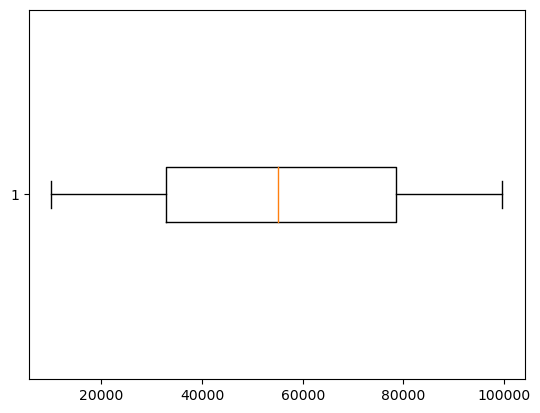

In [96]:
plt.boxplot(df["Taxable.Income"],vert=False)

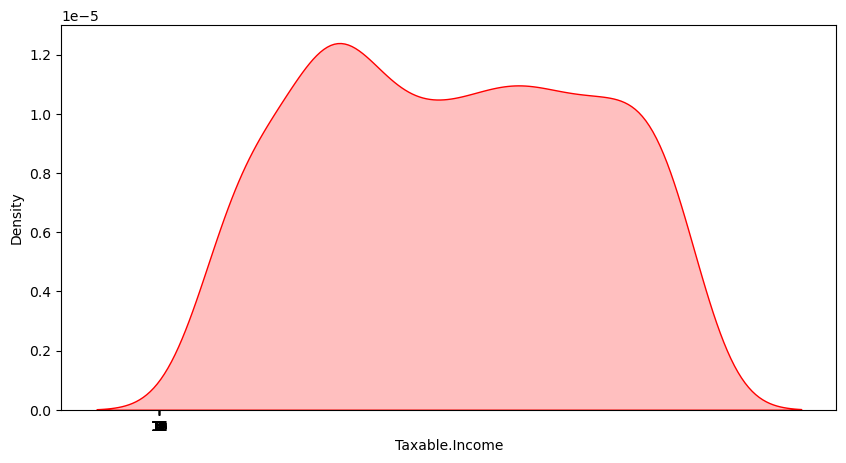

In [97]:
plt.figure(figsize=(10,5))
sn.kdeplot(df["Taxable.Income"],shade=True,color="red")
plt.xticks([i for i in range(0,20,1)]);


In [98]:
df["Taxable.Income"].skew()

0.030014788906377175

In [99]:
df["Taxable.Income"].kurtosis()

-1.1997824607083138

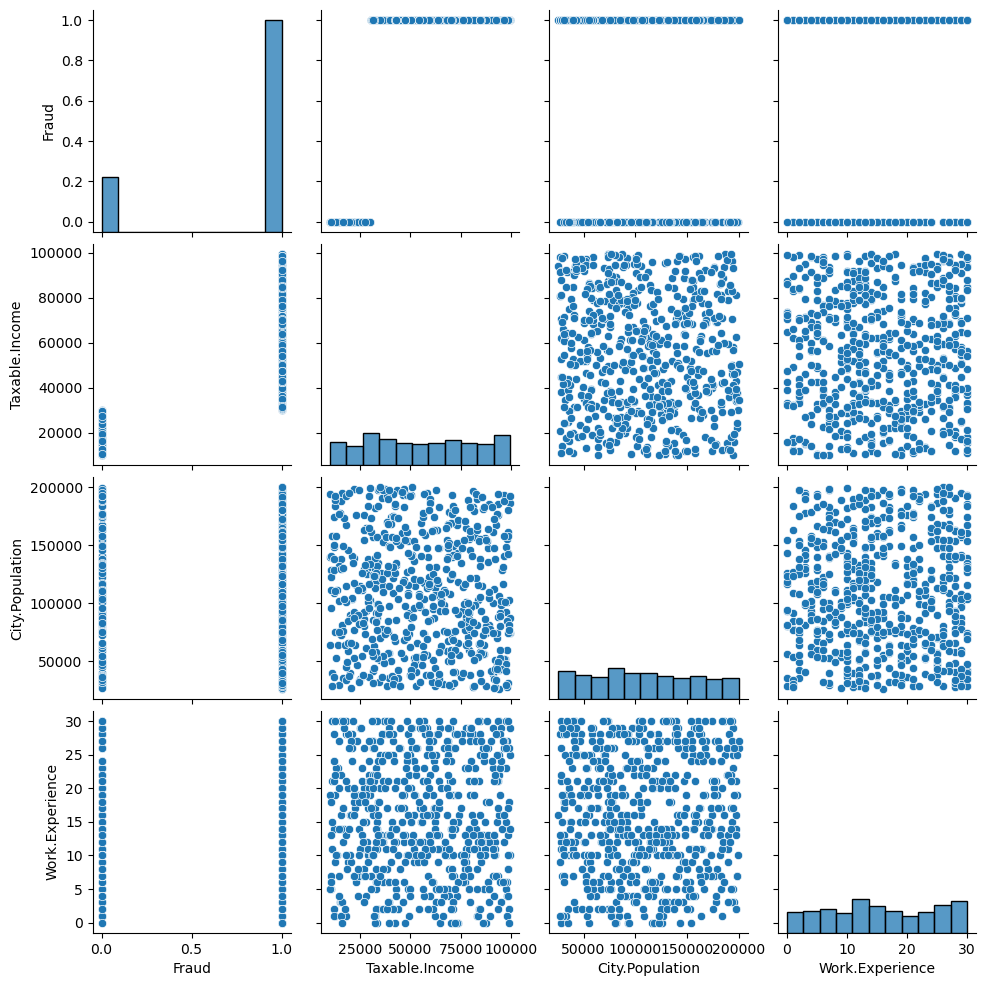

In [127]:
sn.pairplot(df)

In [100]:
df1 = pd.get_dummies(df, columns = ['Undergrad','Marital.Status','Urban'])

In [101]:
df1

,Fraud,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,1,68833,50047,10,1,0,0,0,1,0,1
1,1,33700,134075,18,0,1,1,0,0,0,1
2,1,36925,160205,30,1,0,0,1,0,0,1
3,1,50190,193264,15,0,1,0,0,1,0,1
4,1,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
595,1,76340,39492,7,0,1,1,0,0,0,1
596,1,69967,55369,2,0,1,1,0,0,0,1
597,1,47334,154058,0,1,0,1,0,0,0,1
598,1,98592,180083,17,0,1,0,1,0,1,0


In [102]:
df1.Fraud.value_counts()

1    476
0    124
Name: Fraud, dtype: int64

In [103]:
corr=df1.corr()
corr

,Fraud,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
Fraud,1.000000,0.688725,-0.012225,0.001972,0.012523,-0.012523,0.027115,-0.043178,0.015820,0.004830,-0.004830
Taxable.Income,0.688725,1.000000,-0.064387,-0.001818,0.049232,-0.049232,0.062099,-0.100611,0.037910,-0.070628,0.070628
City.Population,-0.012225,-0.064387,1.000000,0.013135,-0.079579,0.079579,0.004925,-0.007035,0.002087,0.040098,-0.040098
Work.Experience,0.001972,-0.001818,0.013135,1.000000,0.005362,-0.005362,-0.014833,0.033347,-0.018123,0.094559,-0.094559
Undergrad_NO,0.012523,0.049232,-0.079579,0.005362,1.000000,-1.000000,0.045101,-0.015120,-0.028883,-0.000267,0.000267
Undergrad_YES,-0.012523,-0.049232,0.079579,-0.005362,-1.000000,1.000000,-0.045101,0.015120,0.028883,0.000267,-0.000267
Marital.Status_Divorced,0.027115,0.062099,0.004925,-0.014833,0.045101,-0.045101,1.000000,-0.468757,-0.510435,0.065518,-0.065518
Marital.Status_Married,-0.043178,-0.100611,-0.007035,0.033347,-0.015120,0.015120,-0.468757,1.000000,-0.520317,-0.016771,0.016771
Marital.Status_Single,0.015820,0.037910,0.002087,-0.018123,-0.028883,0.028883,-0.510435,-0.520317,1.000000,-0.047014,0.047014
Urban_NO,0.004830,-0.070628,0.040098,0.094559,-0.000267,0.000267,0.065518,-0.016771,-0.047014,1.000000,-1.000000


<AxesSubplot:>

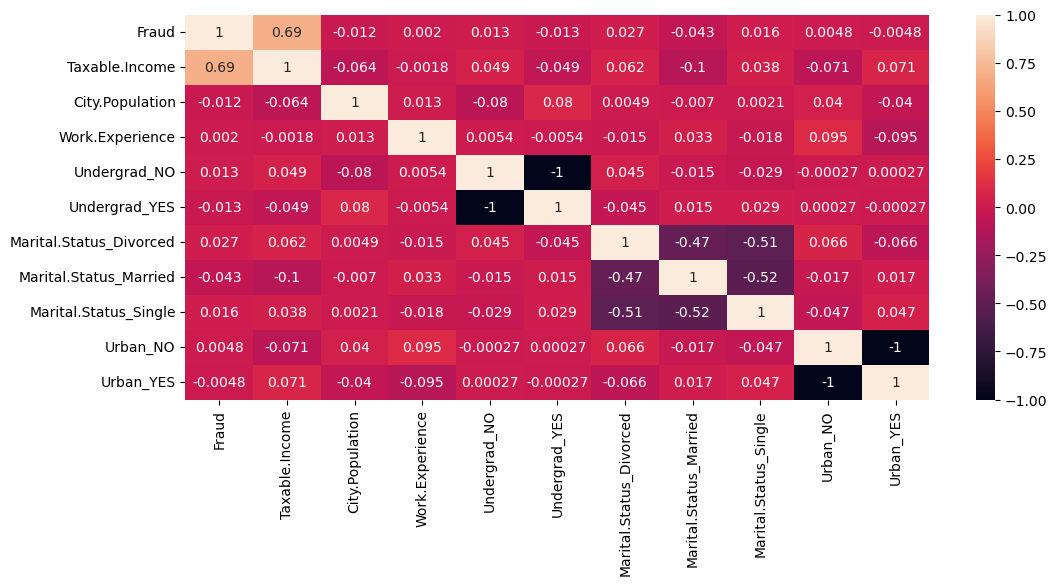

In [104]:
plt.figure(figsize=(12,5))
sn.heatmap(corr,annot=True)

# DT CLASSIFIER

In [105]:
df1=df1.drop(["Taxable.Income"],axis=1)


In [106]:
df1

,Fraud,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,1,50047,10,1,0,0,0,1,0,1
1,1,134075,18,0,1,1,0,0,0,1
2,1,160205,30,1,0,0,1,0,0,1
3,1,193264,15,0,1,0,0,1,0,1
4,1,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,1,39492,7,0,1,1,0,0,0,1
596,1,55369,2,0,1,1,0,0,0,1
597,1,154058,0,1,0,1,0,0,0,1
598,1,180083,17,0,1,0,1,0,1,0


In [107]:
x=df1.iloc[:,1:]
y=df1.iloc[:,0]

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=33)

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=None,random_state=33)

In [111]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=33)

In [112]:
pred=model.predict(x_test)
pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [113]:
[pred==y_test]

[456    False
 366    False
 131     True
 448     True
 337    False
        ...  
 438    False
 492    False
 177     True
 215     True
 516    False
 Name: Fraud, Length: 120, dtype: bool]

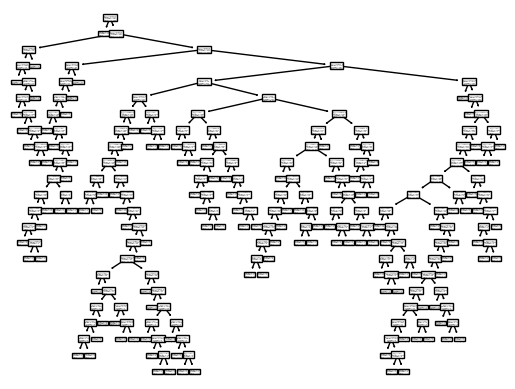

In [114]:
tree.plot_tree(model);

In [115]:
model.score(x_train,y_train)

1.0

In [116]:
model.score(x_test,y_test)

0.6333333333333333

In [117]:
param_dist={
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4,5,6,7,8,9,10,11,12,13,15,None]
}

In [128]:
grid=GridSearchCV(
    model,param_grid=param_dist,cv=20,n_jobs=-1)

In [129]:
grid.fit(x_train,y_train)

GridSearchCV(cv=20,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=33),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 15, None]})

In [130]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [131]:
model1=DecisionTreeClassifier(criterion="gini",max_depth=1,random_state=33)

In [132]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1, random_state=33)

In [133]:
pred1=model1.predict(x_test)
pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [124]:
model1.score(x_train,y_train)

0.8041666666666667

In [125]:
model1.score(x_test,y_test)

0.75

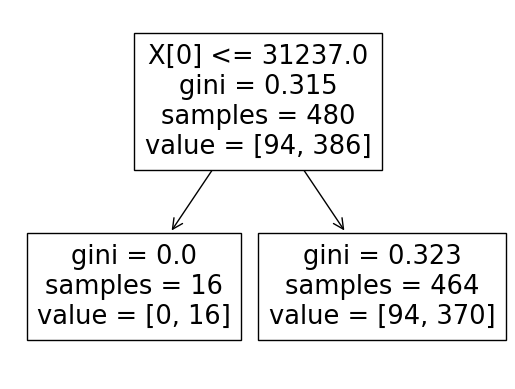

In [126]:
tree.plot_tree(model1);